# 01: Úvod a vizualizace

## Import základních balíčků

### NumPy 
  * Balíček pro rychlé „vědecké“ výpočty (zejména lineární algebra a náhodná čísla).
  * Většinou se jedná jen o interface k vysoce optimalizovaným C/C++/Fortran knihovnám.
  * http://www.numpy.org/

### pandas
  * Oblíbený nástroj pro datovou analýzu.
  * Pomáhá usnadnit práci s tabulkovými daty.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Soubor nástrojů datové vědy psaný v Pythonu.
  * Staví na NumPy, [SciPy](https://www.scipy.org/) a matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Základní knihovna pro vykreslování grafů.
  * https://matplotlib.org/

### seaborn
  * Nástroj pro vizualizaci dat, založený na matplotlib.
  * https://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

## Základní práce s daty pomocí knihovny pandas

  - Načtěte datasety data1.csv a data2.csv pomocí pandas.
  - Zjistěte, jakých typů jsou data ve sloupcích (obsahují stringy, čísla, ...? Jaký mají rozsah?)

### Načítání dat

  - Načítání dat z csv souborů do pandas typu DataFrame.

In [2]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv',sep=';')

### Pomocí pandas funkcí si můžeme zobrazit základní informace o datasetu

In [3]:
df = data2
#df.head()
#df.info()
#df.describe()
#df.isnull().sum()
#df.notnull().sum()
#display(df.head())
#df.head()

### Základy přístupu k datům 

In [4]:
#data1['Age'] # vrátí sloupec se jménem (pandas.Series.name) Age
#data1.Age # totéž co výše
#data1['Age'][:10] # vrátí prvních 10 záznamů ze sloupce Age 
#data1['Age'][:3][[True, False, True]]
#data1['Age'] > 30 # podmínka se použije na všechny záznamy -> vrací pandas.Series s výsledky (hodnoty True nebo False)
#data1[data1['Age'] > 30] # vrátí jen osoby starší než 30 let
#data1[['Age', 'Survived']].head() # vrátí jen zadané sloupce
#data1_tmp = data1.copy() # vytvoří hlubokou kopii dataframe
#data1_tmp.columns = range(12) # přejmenování sloupců
#display(data1.head())
#data1_tmp.head()
#data1[1:2] # vrací první řádek
#data1.loc[1,['Age', 'Sex']] # indexy (viz .loc? a .iloc?)

## Úloha 01: Zřetězení dat

  - Připojte data2.csv za data1.csv následujícím způsobem:
      - Data (sloupce), která nejsou v data1.csv jsou v data2.csv vynechána.
      - Spočítejte věk pomocí sloupce BirthYear (rok narození) v data2.csv a uložte jej do sloupce Age.
      - PasangerId musí být unikátní.
      - Použijte metodu pandas.concat.

In [5]:
### sem napište svůj kód

## Vizualizace pomocí pandas a seaborn

In [6]:
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib
# bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
matplotlib.style.use('ggplot')

### Vliv sloupců Pclass, Age a Sex na přežití cestujících

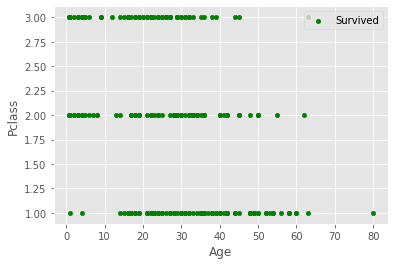

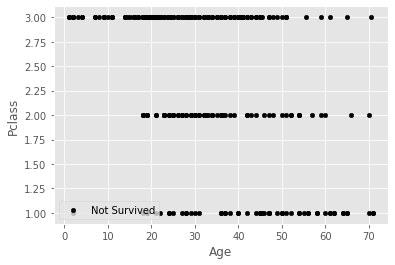

In [12]:
data = data1

#data.plot() # výchozí chování metody plot()
#podívejte se, jaké druhy grafů jsou k dispozici
#data.plot?

# získání přeživších a nepřeživších osob
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

ax = survived.plot.scatter(x='Age', y='Pclass', color='Green', label='Survived')
not_survived.plot(x='Age', y='Pclass', kind='scatter', color='Black', label='Not Survived')
# vykreslení grafů do jednoho obrázku:
#not_survived.plot.scatter(x='Age', y='Pclass', color='Black', label='Not Survived', ax = ax)

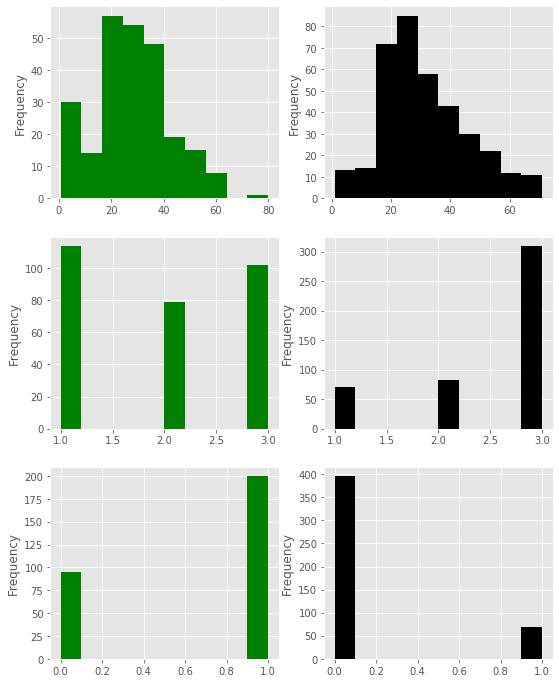

In [9]:
plt.figure(figsize=(9,12)) # velikost figsize se určuje v palcích (angl. inches)
plt.subplot(321) # tři řádky a dva sloupce, přiřaď následující graf do prvního slotu
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

## Seaborne: jak zjistit vztahy mezi příznaky

In [ ]:
plt.figure(figsize=(14,12))
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
cor_matrix = data.drop('PassengerId', axis=1).corr()
print(cor_matrix)
sns.heatmap(cor_matrix, annot=True)

## Úloha 02: vytvořte bodový graf (scatter plot) pro všechny dvojice příznaků

  - K vykreslení všech (smysluplných) dvojic příznaků použijte metodu sns.pairplot, podobným způsobem jako metodu níže.

In [ ]:
plt.figure(figsize=(12,4))
sns.stripplot(x="Pclass", y="Age", hue="Survived", data=data, palette= ['black','green']) # add jitter=True

In [ ]:
### sem napište svůj kód

## Stahování dat z webu pomocí Pythonu a pandas (1. úkol)
          
### Tipy pro scrapping s Pythonem:
   - K získání HTML zdrojáku stránky s `url` použijte `import requests`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Metoda `pandas.read_html(r.text)` uloží všechny tabulky `<table>` jako seznam pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Pro HTML parsování lze použít `from bs4 import BeautifulSoup`.

In [ ]:
# příklad pro statutární město Kladno, výsledky voleb pro rok 2010
url = 'https://www.volby.cz/pls/kv2018/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=5103&xobec=563889&xstat=0&xvyber=0' # výsledky voleb
dfs = pd.read_html(url,flavor='html5lib')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(dfs[0:])

### Pro zajímavost (z loňského roku): Příklad jednoduchého stažení dat z webu pomocí POST formuláře.

Úkolem je stáhnout všechna data z http://kap.ujak.cz/index.php a uložit je ve formátu pandas DataFrame.

In [ ]:
# url s formulářem
url = 'http://kap.ujak.cz/index.php?strana={}'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'typ' : 'kap',
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data)
    r.encoding='cp1250'
    ldf = pd.read_html(r.text,flavor='html5lib', header=0)
    df = ldf[0]
    strana = 30
    if data_all.shape[0] == 0:
        data_all = df.copy()
    else:
        data_all = pd.concat([data_all,df], ignore_index=True)
    while df.shape[0] > 0:
        if data_all.shape[0] > 200: # just to prevent from downloading all data
            break
        print(url.format(strana))
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df = ldf[0]
        strana = strana + 30
        data_all = pd.concat([data_all,df], ignore_index=True)

In [ ]:
dataUJAK = pd.read_csv('ujak.csv', index_col=0)
display(dataUJAK.head())
dataUJAK[dataUJAK['Rok'] > 2000].groupby(['Název práce']).size().sort_values(ascending=False)